# Importing necessary libraries

In [31]:
from scipy import stats
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Dataframe

In [32]:
df =pd.read_csv("/content/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [34]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Problem statement

---



> Build a simple linear regression model by doing necessary transformations and select the best model.

# Standardizing Column Names

In [35]:
# standardizing column names by removing space
df.columns = df.columns.str.replace(' ','_')

# Correalation

In [36]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


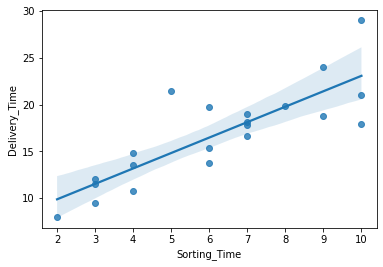

In [37]:
sns.regplot(y="Delivery_Time",x="Sorting_Time",data=df);

> There is positive correlation between sorting time and delivery time.

# **Simple Linear Regression**

In [38]:
y=df["Delivery_Time"]
x=df["Sorting_Time"]

# **Hypothesis testing**

>*   H0 : Model is insignificant.
*   H1 : Model is significant

>*   H0 : Regression Coefficients are insignificant.
*   H1 : Regression Coefficients are significant.




## NO Transformation

In [39]:
model1 =smf.ols("y~x",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        05:28:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lin-Log transformation

In [40]:
x_log=np.log(x)

In [41]:
model2 = smf.ols("y~x_log",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        05:28:58   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
x_log          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log-Lin transformation

In [42]:
y_log=np.log(y)

In [43]:
model3 = smf.ols("y_log~x",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                        05:28:58   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
x              0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log-Log transformation

In [44]:
y_log=np.log(y)
x_log=np.log(x)

In [45]:
model4 = smf.ols("y_log~x_log",data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                        05:28:58   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
x_log          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square-root transformation of X

In [46]:
x_sqrt = np.sqrt(x)

In [47]:
model5 = smf.ols("y~x_sqrt",data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.61e-06
Time:                        05:28:58   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
x_sqrt         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square-root transformation of Y

In [48]:
y_sqrt = np.sqrt(y)

In [49]:
model6 = smf.ols("y_sqrt~x",data=df).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.00e-06
Time:                        05:28:58   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7727      0.205     13.527      0.000       2.344       3.202
x              0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square-root transformation of X and Y

In [50]:
x_sqrt = np.sqrt(x)
y_sqrt = np.sqrt(y)

In [51]:
model7 = smf.ols("y_sqrt~x_sqrt",data=df).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_sqrt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           8.48e-07
Time:                        05:28:59   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
x_sqrt         1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## inverse model

In [52]:
x_inv=1/x

In [53]:
model8 = smf.ols("y~x_inv",data=df).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     34.27
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           1.23e-05
Time:                        05:28:59   Log-Likelihood:                -52.571
No. Observations:                  21   AIC:                             109.1
Df Residuals:                      19   BIC:                             111.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5196      1.484     16.518      0.000      21.413      27.626
x_inv        -38.9338      6.651     -5.854      0.000     -52.854     -25.014
==============================================================================
Omnibus:                        7.255   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.797
Skew:                           1.050   Prob(JB):                       0.0909
Kurtosis:                       4.037   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## S-curve model

In [54]:
x_inv=1/x
y_log=np.log(y)

In [55]:
model9 = smf.ols("y_log~x_inv",data=df).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           2.24e-07
Time:                        05:28:59   Log-Likelihood:                 9.9235
No. Observations:                  21   AIC:                            -15.85
Df Residuals:                      19   BIC:                            -13.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3029      0.076     43.630      0.000       3.144       3.461
x_inv         -2.6605      0.339     -7.844      0.000      -3.370      -1.951
==============================================================================
Omnibus:                        0.870   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.532
Skew:                           0.380   Prob(JB):                        0.767
Kurtosis:                       2.825   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **We will use S-curve model because of high R-square and Adjusted R-square value**


*   Here p-value is less than 0.05 at 5% level of significance so we may reject the null hypothesis and may conclude that model is significant.

*   Here p-value is less than 0.05 at 5% level of significance so we may reject the null hypothesis and may conclude that regression coefficient are significant.


In [56]:
model9.params

Intercept    3.302922
x_inv       -2.660538
dtype: float64

In [57]:
# x=1/x_inv
x=1/-2.660538
x


-0.3758638290451029

>if there is increase in sorting time by 1 unit , there will be 0.38 decrese in delivery time

In [58]:
(model9.rsquared,model9.rsquared_adj)

(0.7640533808614293, 0.7516351377488729)

> here, the model explains 75% of the variation in dependent variable.